In [1]:
#to import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load dataset salary1.csv
df=pd.read_csv('salary1.csv')
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
#to delete useless col
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
#to see dropped or not
df.head(2)

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [5]:
#to check null values
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

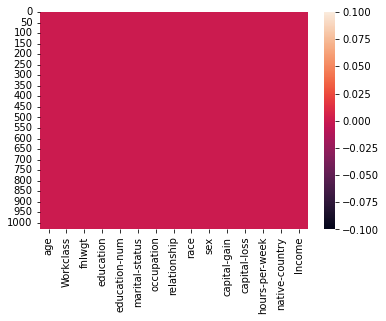

In [6]:
#to see visually
sb.heatmap(df.isnull())
plt.show()

In [7]:
#to see datatypes
df.dtypes

age                int64
Workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income             int64
dtype: object

In [8]:
#to see duplicate values
df.duplicated().sum()

0

In [9]:
#to see no of rows and cols
df.shape

(1032, 15)

In [10]:
#to see mean,median
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


In [11]:
#here Income is output which is categorical/discrete 
#to see how many categories in Income col
df['Income'].unique()

array([0, 1], dtype=int64)

In [12]:
#to see how many categories in Income col
df['Income'].value_counts()

0    778
1    254
Name: Income, dtype: int64

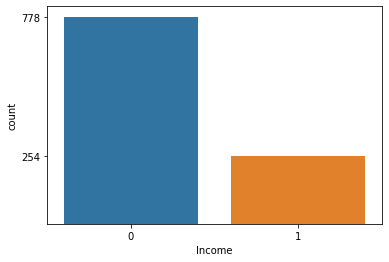

In [13]:
#to visualize
sb.countplot(data=df,x='Income')
f=df['Income'].value_counts()
plt.yticks(f)
plt.show()

In [14]:
#to split the data into object type and int type
df_cat=df.select_dtypes(object)
df_cat.dtypes

Workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

In [15]:
df_num=df.select_dtypes('int64')
df_num.dtypes

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
Income            int64
dtype: object

In [16]:
#call label encoder
from sklearn.preprocessing import LabelEncoder
#convert all object type to numeric type using 
for col in df_cat:
    #create a object for LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [17]:
#to see its converted or not
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


In [18]:
#see the dtypes
df_cat.dtypes

Workclass         int32
education         int32
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
native-country    int32
dtype: object

In [19]:
#now we will merge both the df(df_cat and df_num) now and hold it into new df
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,39,77516,13,2174,0,40,0
1,4,9,2,3,0,4,1,28,50,83311,13,0,0,13,0
2,2,11,0,5,1,4,1,28,38,215646,9,0,0,40,0
3,2,1,2,5,0,2,1,28,53,234721,7,0,0,40,0
4,2,9,2,9,5,2,0,4,28,338409,13,0,0,40,0


In [20]:
#to select input and output
X=df_new.drop('Income',axis=1) #dropping so rest others stay as input 
Y=df_new['Income'] #output

In [21]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [22]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((722, 14), (310, 14), (722,), (310,))

In [23]:
#to apply StandardScaler 
from sklearn.preprocessing import StandardScaler
#to create an object of StandardScaler
ss=StandardScaler()
#to apply 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
#to apply LogisticRegression 
from sklearn.linear_model import LogisticRegression

In [25]:
#to create an object
lr=LogisticRegression()

In [26]:
#to train use fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [27]:
#to test use predict
Y_pred=lr.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [28]:
#to compare Y_pred and Y_test
dict={'Actual Output':Y_test,'Predicted output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(10)

,Actual Output,Predicted output
339,0,0
244,0,0
862,1,1
567,0,0
926,0,0
358,0,0
576,1,0
27,0,0
997,0,0
563,0,0


In [29]:
#confusion matrix and classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
#classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

[[227  11]
 [ 43  29]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       238
           1       0.72      0.40      0.52        72

    accuracy                           0.83       310
   macro avg       0.78      0.68      0.71       310
weighted avg       0.81      0.83      0.81       310



In [30]:
#we can see that f1 score diff between 0 & 1 is more 
#Here We saw , more score difference between 0 and 1 class ,
#reason behind this is that there can be  Data unbalance(output variable)

In [31]:
df_new['Income'].value_counts()

0    778
1    254
Name: Income, dtype: int64

In [32]:
#we can see diff between 0 and 1 is more then half , it means output is unbalanced 

In [33]:
#to overcome this situation we use Sampling Technique
#RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [34]:
X_train.shape,Y_train.shape

((722, 14), (722,))

In [35]:
Y_train.value_counts()

0    540
1    182
Name: Income, dtype: int64

In [36]:
#to convert minority class to majority class using RandomOverSampler
#now create a object
ros=RandomOverSampler(random_state=1)

In [37]:
#apply oversampler on training data
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [38]:
#check oversampler has worked or not
Y_train_ros.value_counts()

1    540
0    540
Name: Income, dtype: int64

In [39]:
X_train_ros.shape,Y_train_ros.shape

((1080, 14), (1080,))

In [40]:
#similarly apply on testing data
#first check
Y_test.value_counts()

0    238
1     72
Name: Income, dtype: int64

In [41]:
#apply oversampler on testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [42]:
#check oversampler has worked or not
Y_test_ros.value_counts()

0    238
1    238
Name: Income, dtype: int64

In [43]:
X_test_ros.shape,Y_test_ros.shape

((476, 14), (476,))

In [44]:
#data balancing done 

In [45]:
#train the model with X_train_ros,Y_train_ros
lr=LogisticRegression()

In [46]:
lr.fit(X_train_ros,Y_train_ros)

LogisticRegression()

In [48]:
#test the data
Y_pred=lr.predict(X_test_ros)

In [49]:
#confusion matrix and classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test_ros,Y_pred))
#classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test_ros,Y_pred))

[[186  52]
 [ 67 171]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       238
           1       0.77      0.72      0.74       238

    accuracy                           0.75       476
   macro avg       0.75      0.75      0.75       476
weighted avg       0.75      0.75      0.75       476

